# Figure 4D: Drift and diffusion statistics

### Import packages

In [1]:
import cellplots as cp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

### Load the compiled data

Here, we're looking at the max velocity of each simulated lineage from each model seed trained on the full LARRY dataset.

In [2]:
max_velo = pd.read_pickle("./MaxVelocity.pkl")

### Format data for plotting

In [3]:
PlotData = {}
for n_fates in range(1,4):
    PlotData[n_fates] = {}
    for version, items in max_velo.items():
        f = np.array([val.loc['drift']['v'] for idx, val in items[n_fates].items()])
        g = np.array([val.loc['diffusion']['v'] for idx, val in items[n_fates].items()])
        PlotData[n_fates][version] = {"f": f.mean(), "g": g.mean()}
    PlotData[n_fates] = pd.DataFrame(PlotData[n_fates]).T

### Define helper class for stylish box plot

In [4]:
import ABCParse
from typing import List, Optional

class StylishBoxPlot(ABCParse.ABCParse):
    def __init__(
        self,
        colors: Optional[List[str]] = None,
        widths: Optional[float] = None,
        scatter_kw={
            "alpha": 0.8,
            "s": 35,
        },
        *args,
        **kwargs
    ):
        self.__parse__(locals())

    @property
    def colors(self):
        if not hasattr(self, "_colors") or self._colors is None:
            self._colors = list(cm.tab20.colors)
        return self._colors

    def _background_scatter(self, ax, data):
        for en, (key, val) in enumerate(data.items()):

            x = [key] * len(val)

            if len(x) > 1:
                x_vals = en + 1 + (np.random.random(len(x)) - 0.5) / 5
            else:
                x_vals = en + 1

            ax.scatter(
                x_vals,
                val,
                color=self.colors[en],
                zorder=0,
                ec="None",
                rasterized=False,
                **self._scatter_kw,
            )

    def _background_boxplot(self, ax, data):

        x = list(data.keys())
        y = list(data.values())

        x = np.arange(len(y)) + 1

        bp = ax.boxplot(
            y,
            positions=x,
            patch_artist=True,
            showmeans=True,
            showfliers=False,
            meanline=True,
            zorder=1,
            widths=self._widths,
        )
        for median in bp["medians"]:
            median.set_visible(False)
        for en, mean in enumerate(bp["means"]):
            mean.set_c(self.colors[en])

        for en, box in enumerate(bp["boxes"]):
            box.set_facecolor(self.colors[en])
            box.set_alpha(0.2)

        for en, whisker in enumerate(bp["whiskers"]):
            whisker.set_c("None")

        for en, cap in enumerate(bp["caps"]):
            cap.set_c("None")

    def _foreground_boxplot(self, ax, data):

        y = list(data.values())
        x = list(data.keys())
        x = np.arange(len(y)) + 1
        bp = ax.boxplot(
            y,
            positions=x,
            patch_artist=True,
            showmeans=False,
            showfliers=False,
            meanline=False,
            zorder=2,
            widths=self._widths,
        )
        for en, box in enumerate(bp["boxes"]):
            box.set_facecolor("None")
            box.set_edgecolor(self.colors[en])

        colors_ = np.repeat(
            np.array(self.colors), 2, axis=0
        )  # list(np.repeat(self.colors, 2))
        for en, whisker in enumerate(bp["whiskers"]):
            whisker.set_c(colors_[en])

        for en, cap in enumerate(bp["caps"]):
            cap.set_c(colors_[en])

        for median in bp["medians"]:
            median.set_visible(False)

    def __call__(self, ax, data, *args, **kwargs):

        self.__update__(locals())

        try:
            self._background_scatter(ax, data)
        except:
            print(data)
        self._background_boxplot(ax, data)
        self._foreground_boxplot(ax, data)

In [5]:
fplot = {n_fates: list(data['f'].values) for n_fates, data in PlotData.items()}
gplot = {n_fates: list(data['g'].values) for n_fates, data in PlotData.items()}

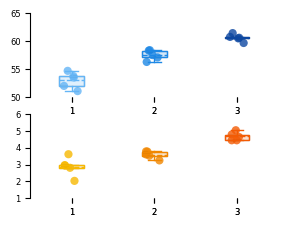

In [6]:
fig, axes = cp.plot(nplots = 2, ncols = 1, hspace = 0.2, height = 0.25, width = 0.5, delete=[['top', 'right', 'bottom']]*2)

boxplot = StylishBoxPlot(colors=["#64b5f6", "#1e88e5", "#0d47a1"])
boxplot(ax = axes[0], data = fplot)

boxplot = StylishBoxPlot(colors=["#f7b801", "#f18701", "#f35b04"])
boxplot(ax = axes[1], data = gplot)
axes[0].set_ylim(50, 65)
axes[1].set_ylim(1, 6)
plt.savefig("Figure4D.svg", dpi = 250)
